## What is the variation in $dm$ and $dt$ in our data?

In [1]:
from os import chdir
chdir('/home/shoaib/Thesis/dmdt_Analysis/')
from dmdt_functions import get_differenciation, get_2Dhistogram

In [2]:
import pandas as pd
import numpy as np

from scipy.integrate import simps


import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
plt.style.use('seaborn-v0_8-colorblind')

In [3]:
filtered_lightcurves_file = "/home/shoaib/PSChallenge/filtered_lightcurves.parquet"

In [4]:
all_lightcurves = pd.read_parquet(filtered_lightcurves_file)
# all_lightcurves = all_lightcurves.sample(frac=0.3)

### Making $dm$ and $dt$ difference histograms
With the following bins:
```
dm_bins = np.linspace(-2, 2, 10_000)
dt_bins = np.linspace(0, 10_000, 20_000)
```

In [5]:
all_lightcurves = pd.read_parquet(filtered_lightcurves_file)

dm_min, dm_max = -4, 4
dt_min, dt_max = 0, 1500
dm_nbins = 500
dt_nbins = 10_000

dm_bins = np.linspace(dm_min, dm_max, dm_nbins)
dt_bins = np.linspace(dt_min, dt_max, dt_nbins)

In [6]:
# dm_histogram_tot = np.zeros(shape=(dm_bins.size - 1, ))
# dt_histogram_tot = np.zeros(shape=(dt_bins.size - 1, ))

# grouped = all_lightcurves.groupby(['name', 'band'])

# dm_histogram_dict_list = []
# dt_histogram_dict_list = []

# num_total_groups = len(grouped)
# count = 0

# for (name, band), df in grouped:
#     count += 1
#     print(f'{count}\t/ {num_total_groups} objects in their bands done.')
    
#     df = df.sort_values(by='mjd')
#     mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    
#     dmags, dtimes = get_differenciation(magnitudes=mags, times=times, log_dt=False)
#     dm_histogram, _ = np.histogram(dmags, bins=dm_bins)
#     dt_histogram, _ = np.histogram(dtimes, bins=dt_bins)
#     object_type = df['type'].iloc[0]

#     dm_histogram_dict_list.append({'name': name, 'type': object_type, 'band': band, 'cadence_histogram': dm_histogram})
#     dt_histogram_dict_list.append({'name': name, 'type': object_type, 'band': band, 'cadence_histogram': dt_histogram})

# del all_lightcurves, grouped

# dm_df = pd.DataFrame(dm_histogram_dict_list)
# del dm_histogram_dict_list
# dm_df.to_pickle(f'/home/shoaib/Thesis/Misc/dm_{dm_min}_{dm_max}_{dm_nbins}.pkl')
# del dm_df

# dt_df = pd.DataFrame(dt_histogram_dict_list)
# del dt_histogram_dict_list
# dt_df.to_pickle(f'/home/shoaib/Thesis/Misc/dt_{dt_min}_{dt_max}_{dt_nbins}.pkl')
# del dt_df

In [7]:
dm_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/dm_{dm_min}_{dm_max}_{dm_nbins}.pkl')
dt_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/dt_{dt_min}_{dt_max}_{dt_nbins}.pkl')

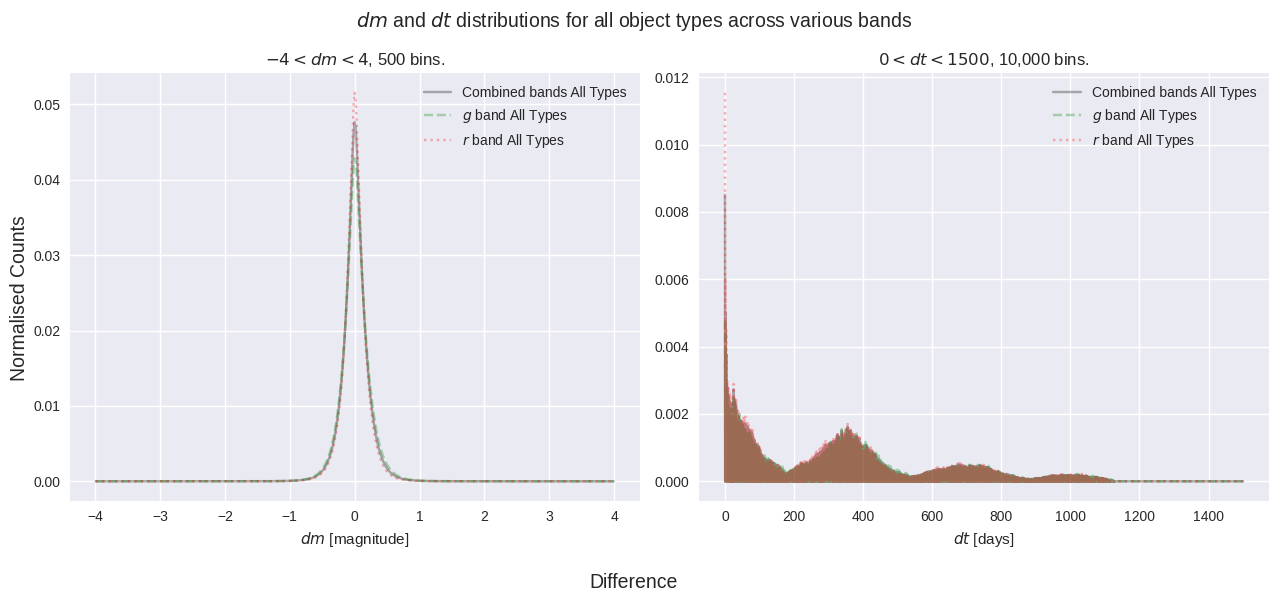

In [8]:
dm_hists_all_types = dm_df['cadence_histogram'].sum()
g_dm_hists_all_types = dm_df[dm_df['band'] == 'g']['cadence_histogram'].sum()
r_dm_hists_all_types = dm_df[dm_df['band'] == 'r']['cadence_histogram'].sum()

dt_hists_all_types = dt_df['cadence_histogram'].sum()
g_dt_hists_all_types = dt_df[dt_df['band'] == 'g']['cadence_histogram'].sum()
r_dt_hists_all_types = dt_df[dt_df['band'] == 'r']['cadence_histogram'].sum()

dm_bin_centres = [(dm_bins[i + 1] + dm_bins[i]) / 2 for i in range(len(dm_bins) - 1)]
dt_bin_centres = [(dt_bins[i + 1] + dt_bins[i]) / 2 for i in range(len(dt_bins) - 1)]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

axs[0].plot(dm_bin_centres, dm_hists_all_types / dm_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
axs[0].plot(dm_bin_centres, g_dm_hists_all_types / g_dm_hists_all_types.sum(), color='g', label='$g$ band All Types', alpha=0.3, linestyle='--')
axs[0].plot(dm_bin_centres, r_dm_hists_all_types / r_dm_hists_all_types.sum(), color='r', label='$r$ band All Types', alpha=0.3, linestyle=':')
axs[0].set_title(f'${dm_min} < dm < {dm_max}$, {dm_nbins:,} bins.')
axs[0].set_xlabel('$dm$ [magnitude]')

axs[1].plot(dt_bin_centres, dt_hists_all_types / dt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
axs[1].plot(dt_bin_centres, g_dt_hists_all_types / g_dt_hists_all_types.sum(), color='g', label='$g$ band All Types', alpha=0.3, linestyle='--')
axs[1].plot(dt_bin_centres, r_dt_hists_all_types / r_dt_hists_all_types.sum(), color='r', label='$r$ band All Types', alpha=0.3, linestyle=':')
axs[1].set_title(f'${dt_min} < dt < {dt_max}$, {dt_nbins:,} bins.')
axs[1].set_xlabel('$dt$ [days]')

# axs[1].set_xlim(20, 10_000)

for ax in axs:
    ax.legend()

fig.suptitle('$dm$ and $dt$ distributions for all object types across various bands', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.supxlabel('Difference', size=14)

plt.tight_layout()
plt.show()

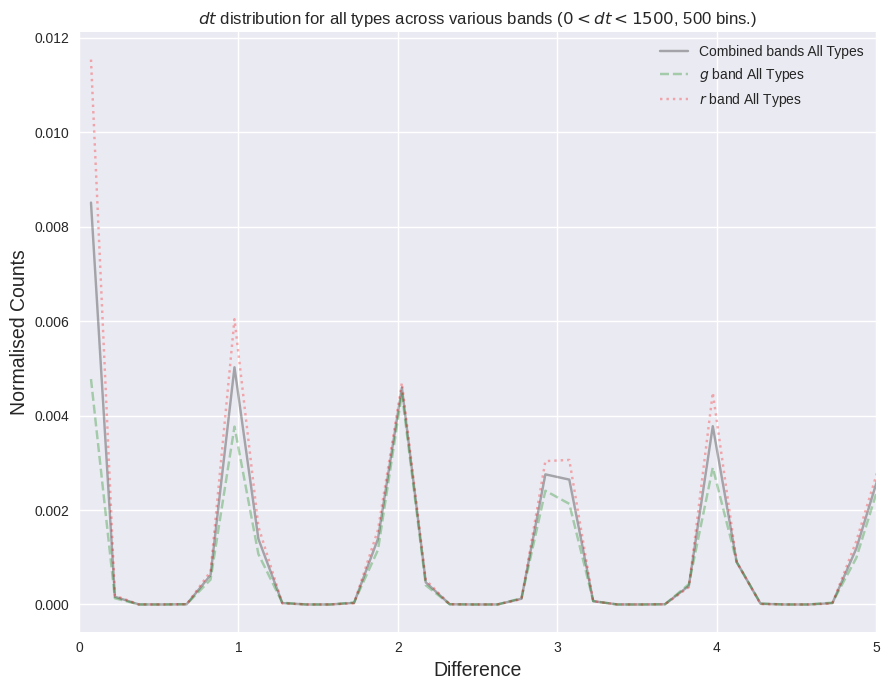

In [11]:
plt.figure(figsize=(9, 7))

plt.plot(dt_bin_centres, dt_hists_all_types / dt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.plot(dt_bin_centres, g_dt_hists_all_types / g_dt_hists_all_types.sum(), color='g', label='$g$ band All Types', alpha=0.3, linestyle='--')
plt.plot(dt_bin_centres, r_dt_hists_all_types / r_dt_hists_all_types.sum(), color='r', label='$r$ band All Types', alpha=0.3, linestyle=':')

plt.title(f'$dt$ distribution for all types across various bands (${dt_min} < dt < {dt_max}$, {dm_nbins:,} bins.)')
plt.xlim(0, 5)

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference', size=14)

plt.legend()
plt.tight_layout()
plt.show()

In [12]:
dt_min, dt_max = 0, 50
dt_nbins = 10_000

dt_bins = np.linspace(dt_min, dt_max, dt_nbins)

In [13]:
# dt_histogram_tot = np.zeros(shape=(dt_bins.size - 1, ))

# grouped = all_lightcurves.groupby(['name', 'band'])

# dt_histogram_dict_list = []

# num_total_groups = len(grouped)
# count = 0

# for (name, band), df in grouped:
#     count += 1
#     print(f'{count}\t/ {num_total_groups} objects in their bands done.')
    
#     df = df.sort_values(by='mjd')
#     mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    
#     dmags, dtimes = get_differenciation(magnitudes=mags, times=times, log_dt=False)
#     dt_histogram, _ = np.histogram(dtimes, bins=dt_bins)
#     object_type = df['type'].iloc[0]

#     dt_histogram_dict_list.append({'name': name, 'type': object_type, 'band': band, 'cadence_histogram': dt_histogram})

# del all_lightcurves, grouped

# dt_df = pd.DataFrame(dt_histogram_dict_list)
# del dt_histogram_dict_list
# dt_df.to_pickle(f'/home/shoaib/Thesis/Misc/dt_{dt_min}_{dt_max}_{dt_nbins}.pkl')
# del dt_df

In [14]:
dt_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/dt_{dt_min}_{dt_max}_{dt_nbins}.pkl')

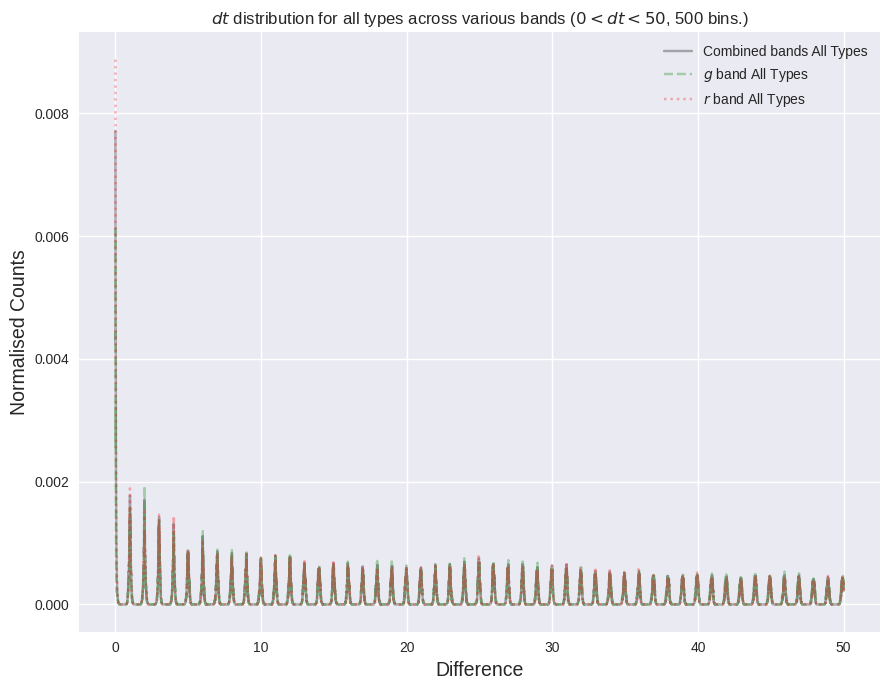

In [15]:
dt_hists_all_types = dt_df['cadence_histogram'].sum()
g_dt_hists_all_types = dt_df[dt_df['band'] == 'g']['cadence_histogram'].sum()
r_dt_hists_all_types = dt_df[dt_df['band'] == 'r']['cadence_histogram'].sum()

dt_bin_centres = [(dt_bins[i + 1] + dt_bins[i]) / 2 for i in range(len(dt_bins) - 1)]

plt.figure(figsize=(9, 7))

plt.plot(dt_bin_centres, dt_hists_all_types / dt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.plot(dt_bin_centres, g_dt_hists_all_types / g_dt_hists_all_types.sum(), color='g', label='$g$ band All Types', alpha=0.3, linestyle='--')
plt.plot(dt_bin_centres, r_dt_hists_all_types / r_dt_hists_all_types.sum(), color='r', label='$r$ band All Types', alpha=0.3, linestyle=':')

plt.title(f'$dt$ distribution for all types across various bands (${dt_min} < dt < {dt_max}$, {dm_nbins:,} bins.)')
# plt.xlim(0, 5)

for ax in axs:
    ax.legend()

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference', size=14)

plt.legend()
plt.tight_layout()
plt.show()

### Making $\log_{10} dt$ difference histograms

In [16]:
logdt_min, logdt_max = -5, 4
logdt_nbins = 10_000
logdt_bins = np.linspace(logdt_min, logdt_max, logdt_nbins)

In [26]:
# logdt_histogram_tot = np.zeros(shape=(logdt_bins.size - 1, ))
# logdt_histogram_dict_list = []

# grouped = all_lightcurves.groupby(['name', 'band'])
# num_total_groups = len(grouped)
# count = 0

# for (name, band), df in grouped:
#     count += 1
#     print(f'{count}\t/ {num_total_groups} objects in their bands done.')
    
#     df = df.sort_values(by='mjd')
#     mags, times = df['mag'].to_numpy(), df['mjd'].to_numpy()
    
#     dmags, logdtimes = get_differenciation(magnitudes=mags, times=times, log_dt=True)
#     logdt_histogram, _ = np.histogram(logdtimes, bins=logdt_bins)
#     object_type = df['type'].iloc[0]

#     logdt_histogram_dict_list.append({'name': name, 'type': object_type, 'band': band, 'cadence_histogram': logdt_histogram})

# del all_lightcurves, grouped

# logdt_df = pd.DataFrame(logdt_histogram_dict_list)
# del logdt_histogram_dict_list
# logdt_df.to_pickle(f'/home/shoaib/Thesis/Misc/logdt_{logdt_min}_{logdt_max}_{logdt_nbins}.pkl')
# del logdt_df

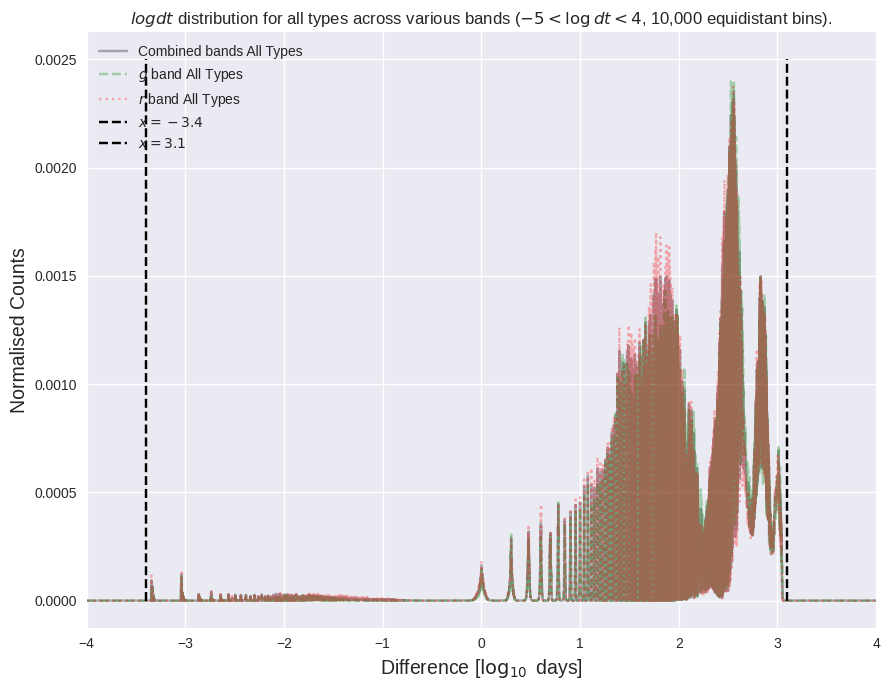

In [17]:
logdt_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/logdt_{logdt_min}_{logdt_max}_{logdt_nbins}.pkl')
logdt_bin_centres = [(logdt_bins[i + 1] + logdt_bins[i]) / 2 for i in range(len(logdt_bins) - 1)]

logdt_hists_all_types = logdt_df['cadence_histogram'].sum()
g_logdt_hists_all_types = logdt_df[logdt_df['band'] == 'g']['cadence_histogram'].sum()
r_logdt_hists_all_types = logdt_df[logdt_df['band'] == 'r']['cadence_histogram'].sum()

plt.figure(figsize=(9, 7))

plt.plot(logdt_bin_centres, logdt_hists_all_types / logdt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.plot(logdt_bin_centres, g_logdt_hists_all_types / g_logdt_hists_all_types.sum(), color='g', label='$g$ band All Types', alpha=0.3, linestyle='--')
plt.plot(logdt_bin_centres, r_logdt_hists_all_types / r_logdt_hists_all_types.sum(), color='r', label='$r$ band All Types', alpha=0.3, linestyle=':')

plt.vlines(-3.4, 0, 0.0025, linestyles='dashed', label=f'$x = -3.4$', color='k')
plt.vlines(3.1, 0, 0.0025, linestyles='dashed', label=f'$x = 3.1$', color='k')

plt.title(f'$log dt$ distribution for all types across various bands (${logdt_min} < \log dt < {logdt_max}$, {logdt_nbins:,} equidistant bins).')

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference [$\log_{10}$ days]', size=14)

plt.xlim(-4, 4)

plt.legend()
plt.tight_layout()
plt.show()

### So what should our bins be?

We'll roughly divide bins to include approximately equal areas under the curves.

In [19]:
logdt_min, logdt_max = -5, 4
logdt_nbins = 10_000
logdt_bins = np.linspace(logdt_min, logdt_max, logdt_nbins)

logdt_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/logdt_{logdt_min}_{logdt_max}_{logdt_nbins}.pkl')

/tmp/ipykernel_30563/3104952866.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area = simps(logdt_hists_all_types, logdt_bin_centres)


Bin edges: [-3.3991899189918993, 0.7745274527452741, 1.2056705670567052, 1.4468946894689463, 1.6125112511251123, 1.7412241224122411, 1.851035103510351, 1.9545454545454541, 2.073357335733573, 2.215571557155715, 2.3550855085508546, 2.4261926192619256, 2.466696669666966, 2.499099909990999, 2.5270027002700264, 2.551305130513051, 2.5738073807380735, 2.5990099009900987, 2.6260126012601255, 2.661116111611161, 2.7304230423042304, 2.8006300630063006, 2.8393339333933394, 2.8762376237623757, 2.936543654365436, 3.022052205220522, 3.0994599459945995]


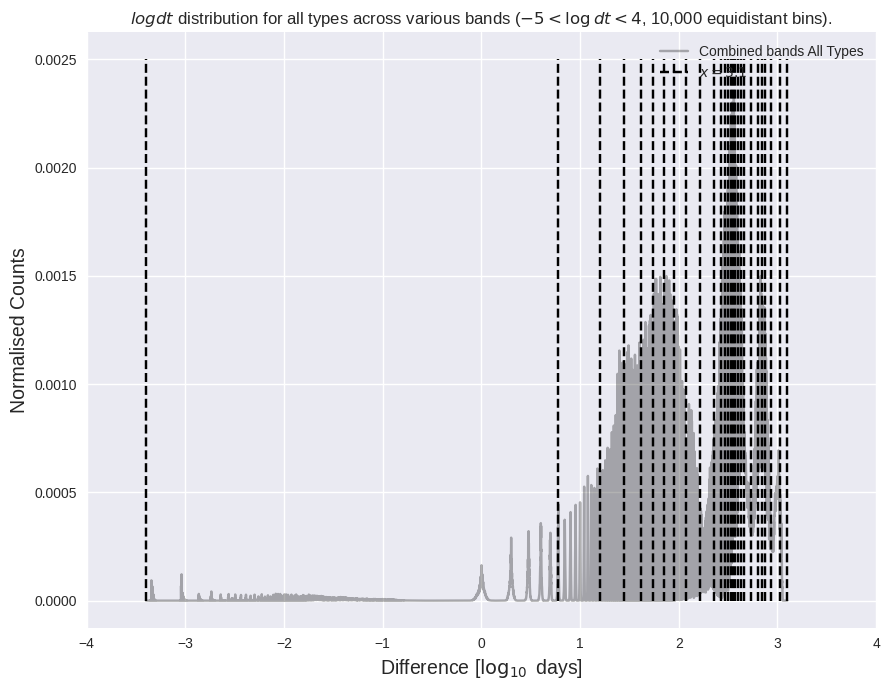

In [20]:
logdt_bin_centres = np.array([(logdt_bins[i + 1] + logdt_bins[i]) / 2 for i in range(len(logdt_bins) - 1)])
logdt_hists_all_types = logdt_df['cadence_histogram'].sum()

indices = np.where((logdt_bin_centres > -3.4) & (logdt_bin_centres < 3.1))[0]
logdt_bin_centres = logdt_bin_centres[indices]
logdt_hists_all_types = logdt_hists_all_types[indices]

n_bins = 51

# Calculate total area under the curve
total_area = simps(logdt_hists_all_types, logdt_bin_centres)

# Target area for each bin
target_area = total_area / n_bins

# Initialize variables
bin_edges = [logdt_bin_centres[0]]  # Start with the first x value
current_area = 0

# Find bin edges
for i in range(1, len(logdt_bin_centres)):
    dx = logdt_bin_centres[i] - logdt_bin_centres[i - 1]
    current_area += 0.5 * ([i] + logdt_hists_all_types[i - 1]) * dx  # Trapezoidal rule

    if current_area >= target_area:
        bin_edges.append(logdt_bin_centres[i])  # Add bin edge
        current_area = 0  # Reset area for the next bin

# Ensure the last bin edge is included
if bin_edges[-1] != logdt_bin_centres[-1]:
    bin_edges.append(logdt_bin_centres[-1])


print("Bin edges:", bin_edges)

plt.figure(figsize=(9, 7))

plt.plot(logdt_bin_centres, logdt_hists_all_types / logdt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.vlines(bin_edges, 0, 0.0025, linestyles='dashed', label=f'$x = 3.1$', color='k')

plt.title(f'$log dt$ distribution for all types across various bands (${logdt_min} < \log dt < {logdt_max}$, {logdt_nbins:,} equidistant bins).')

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference [$\log_{10}$ days]', size=14)

plt.xlim(-4, 4)

plt.legend()
plt.tight_layout()
plt.show()

np.save(f'/home/shoaib/Thesis/dmdt_Analysis/logdt_bins_-3.4_3.1_50.npy', bin_edges)

In [21]:
dt_min, dt_max = 0, 1500
dt_nbins = 10_000

dt_bins = np.linspace(dt_min, dt_max, dt_nbins)
dt_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/dt_{dt_min}_{dt_max}_{dt_nbins}.pkl')

/tmp/ipykernel_30563/1313868436.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area = simps(dt_hists_all_types, dt_bin_centres)


Bin edges: [0.075007500750075, 6.075607560756076, 17.026702670267028, 28.127812781278127, 41.17911791179118, 56.03060306030603, 71.93219321932193, 90.98409840984098, 119.78697869786978, 165.54155415541555, 226.44764476447645, 266.2016201620162, 292.1542154215422, 314.35643564356434, 335.05850585058505, 353.96039603960395, 371.36213621362134, 392.96429642964296, 418.016801680168, 449.96999699969996, 516.8766876687669, 618.2868286828683, 678.1428142814282, 736.1986198619862, 816.1566156615661, 1002.1752175217522, 1159.99099909991]


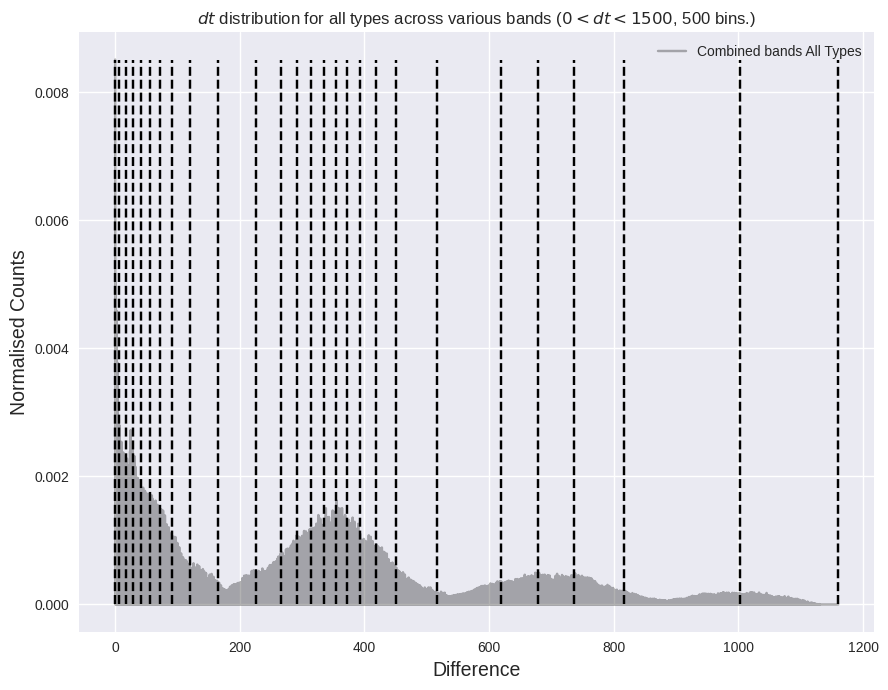

In [22]:
dt_hists_all_types = dt_df['cadence_histogram'].sum()
dt_bin_centres = np.array([(dt_bins[i + 1] + dt_bins[i]) / 2 for i in range(len(dt_bins) - 1)])

indices = np.where((dt_bin_centres < 1160))[0]
dt_bin_centres = dt_bin_centres[indices]
dt_hists_all_types = dt_hists_all_types[indices]

n_bins = 51

# Calculate total area under the curve
total_area = simps(dt_hists_all_types, dt_bin_centres)

# Target area for each bin
target_area = total_area / n_bins

# Initialize variables
bin_edges = [dt_bin_centres[0]]  # Start with the first x value
current_area = 0

# Find bin edges
for i in range(1, len(dt_bin_centres)):
    dx = dt_bin_centres[i] - dt_bin_centres[i - 1]
    current_area += 0.5 * ([i] + dt_hists_all_types[i - 1]) * dx  # Trapezoidal rule

    if current_area >= target_area:
        bin_edges.append(dt_bin_centres[i])  # Add bin edge
        current_area = 0  # Reset area for the next bin

# Ensure the last bin edge is included
if bin_edges[-1] != dt_bin_centres[-1]:
    bin_edges.append(dt_bin_centres[-1])

print("Bin edges:", bin_edges)

plt.figure(figsize=(9, 7))

plt.plot(dt_bin_centres, dt_hists_all_types / dt_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.vlines(bin_edges, 0, (dt_hists_all_types / dt_hists_all_types.sum()).max(), linestyles='dashed', color='k')

plt.title(f'$dt$ distribution for all types across various bands (${dt_min} < dt < {dt_max}$, {dm_nbins:,} bins.)')

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference', size=14)

plt.legend()
plt.tight_layout()
plt.show()

np.save(f'/home/shoaib/Thesis/dmdt_Analysis/dt_bins_0_1160_50.npy', bin_edges)

In [23]:
all_lightcurves = pd.read_parquet(filtered_lightcurves_file)

dm_min, dm_max = -4, 4
dm_nbins = 500

dm_bins = np.linspace(dm_min, dm_max, dm_nbins)
dm_df = pd.read_pickle(f'/home/shoaib/Thesis/Misc/dm_{dm_min}_{dm_max}_{dm_nbins}.pkl')

/tmp/ipykernel_30563/3589923535.py:11: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_area = simps(dm_hists_all_types, dm_bin_centres)


Bin edges: [-0.9939879759519039, -0.3206412825651306, -0.2244488977955914, -0.1603206412825653, -0.1122244488977957, -0.08016032064128309, -0.04809619238477003, -0.0320641282565135, -0.016032064128256973, -4.440892098500626e-16, 0.016032064128256085, 0.032064128256512614, 0.04809619238476914, 0.06412825651302567, 0.09619238476953873, 0.1282565130260518, 0.16032064128256485, 0.20841683366733443, 0.27254509018036055, 0.3687374749498997, 0.8496993987975947, 0.9939879759519035]


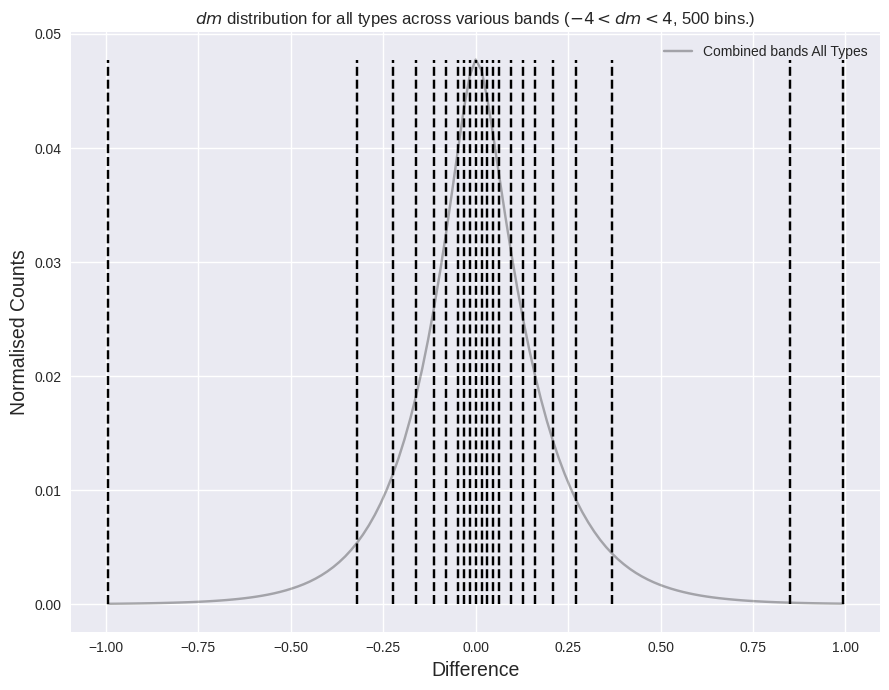

In [28]:
dm_hists_all_types = dm_df['cadence_histogram'].sum()
dm_bin_centres = np.array([(dm_bins[i + 1] + dm_bins[i]) / 2 for i in range(len(dm_bins) - 1)])

indices = np.where((dm_bin_centres > -1) & (dm_bin_centres < 1))[0]
dm_bin_centres = dm_bin_centres[indices]
dm_hists_all_types = dm_hists_all_types[indices]

n_bins = 51

# Calculate total area under the curve
total_area = simps(dm_hists_all_types, dm_bin_centres)

# Target area for each bin
target_area = total_area / n_bins

# Initialize variables
bin_edges = [dm_bin_centres[0]]  # Start with the first x value
current_area = 0

# Find bin edges
for i in range(1, len(dm_bin_centres)):
    dx = dm_bin_centres[i] - dm_bin_centres[i - 1]
    current_area += 0.5 * ([i] + dm_hists_all_types[i - 1]) * dx  # Trapezoidal rule

    if current_area >= target_area:
        bin_edges.append(dm_bin_centres[i])  # Add bin edge
        current_area = 0  # Reset area for the next bin

# Ensure the last bin edge is included
if bin_edges[-1] != dm_bin_centres[-1]:
    bin_edges.append(dm_bin_centres[-1])

print("Bin edges:", bin_edges)

plt.figure(figsize=(9, 7))

plt.plot(dm_bin_centres, dm_hists_all_types / dm_hists_all_types.sum(), color='k', label='Combined bands All Types', alpha=0.3)
plt.vlines(bin_edges, 0, (dm_hists_all_types / dm_hists_all_types.sum()).max(), linestyles='dashed', color='k')

plt.title(f'$dm$ distribution for all types across various bands (${dm_min} < dm < {dm_max}$, {dm_nbins:,} bins.)')

plt.ylabel('Normalised Counts', size=14)
plt.xlabel('Difference', size=14)

plt.legend()
plt.tight_layout()
plt.show()

np.save(f'/home/shoaib/Thesis/dmdt_Analysis/dm_bins_-1_1_50.npy', bin_edges)